# Week 7A: Solution to Dual LP

<font color='blue'><b>Goals of this notebook:</b></font> Understand the dual LP better by 
- reviewing examples for all cases in the duality table;
- constructing examples of some cases yourself.

## Examples of primal-dual pairs in the duality table

As you have seen in the lecture, there are only four possible relations between the primal and dual LPs, namely

| Primal | Dual |
| :- | :- |
| Finite optimum | Finite optimum |
| Infeasible | Unbounded |
| Unbounded | Infeasible |
| Infeasible | Infeasible |

Below you will see examples in each of the four cases. 

### Example 1: Primal and dual have a finite optimal value

Consider the following *primal* LP:

$$\begin{equation}\tag{Primal-LP1}
\begin{array}{lrrrrrrrrr}
\max          &  x_1 & + &  x_2 &   \\
\text{s.t. }  & 2x_1 & + &  x_2 & \leq & 2 \\
              &  x_1 & + & 3x_2 & \leq & 3 \\
              &  x_1 &   &      & \geq & 0\\
              &      &   &  x_2 & \geq & 0
\end{array}
\end{equation}$$

Its *dual problem* is the following:

$$\begin{equation}\tag{Dual-LP1}
\begin{array}{lrrrrrrrr}
\min   & 2y_1  & + & 3y_2 & \\
\text{s.t. } & 2y_1 & + &  y_2  & \geq & 1 \\
             &  y_1 & + & 3y_2  & \geq & 1 \\
             &  y_1 &   &       & \geq & 0 \\
             &      &   &  y_2  & \geq & 0 
\end{array}
\end{equation}$$

We can use `PuLP` to solve these two LPs and see that both LPs have a finite optimal value. Furthermore, we can also verify the strong duality theorem, which states that the two problems have the same optimal value.

*Remark: The small difference in the optimal value is caused by rounding errors.*

In [1]:
import pulp

primalLP1 = pulp.LpProblem("Primal1", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat=pulp.LpContinuous)
x2 = pulp.LpVariable('x2', lowBound=0, cat=pulp.LpContinuous)

primalLP1 += x1 + x2

primalLP1 += 2*x1 + x2 <= 2
primalLP1 += x1 + 3*x2 <= 3

primalLP1.solve()

print("Solution of the primal:")
# Print the optimal objective value of primalLP
print(primalLP1.objective.value())
# Print the optimal vertex
for v in primalLP1.variables():
    print(str(v) + " = " + str(v.value()))
print("Status: " + str( pulp.LpStatus[primalLP1.status]) )

Solution of the primal:
1.4
x1 = 0.6
x2 = 0.8
Status: Optimal


In [2]:
dualLP1 = pulp.LpProblem("Dual1", pulp.LpMinimize)

y1 = pulp.LpVariable('y1', lowBound=0, cat=pulp.LpContinuous)
y2 = pulp.LpVariable('y2', lowBound=0, cat=pulp.LpContinuous)

dualLP1 += 2*y1 + 3*y2

dualLP1 += 2*y1 + y2 >= 1
dualLP1 += y1 + 3*y2 >= 1

dualLP1.solve()

print("Solution of the dual:")
# Print the optimal objective value of primalLP
print(dualLP1.objective.value())
# Print the optimal vertex
for v in dualLP1.variables():
    print(str(v) + " = " + str(v.value()))
print("Status: " + str( pulp.LpStatus[dualLP1.status]) )

Solution of the dual:
1.4000000000000001
y1 = 0.4
y2 = 0.2
Status: Optimal


You can also visualize the feasible regions of the LPs using the following code and see that they are both optimal. (As always, please make sure you have saved `plotLP.py` from Moodle in the same folder.)

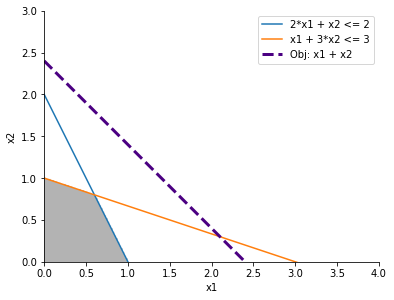

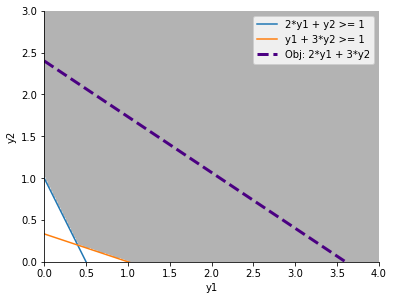

In [3]:
%matplotlib inline
from plotLP import *  
plotLP(primalLP1, x_lower=0, x_upper=4, y_lower=0, y_upper=3)
plotLP(dualLP1, x_lower=0, x_upper=4, y_lower=0, y_upper=3)

### Example 2: Primal infeasible, dual unbounded

We change the primal LP a little bit so that it becomes infeasible.

$$\begin{equation}\tag{Primal-LP2}
\begin{array}{lrrrrrrrrr}
\max          &  x_1 & + &  x_2 &   \\
\text{s.t. }  & 2x_1 & - &  x_2 & \leq & 1 \\
              & -3x_1 & + & 2x_2 & \leq & -3 \\
              &  x_1 &   &      & \geq & 0\\
              &      &   &  x_2 & \geq & 0
\end{array}
\end{equation}$$

The corresponding dual is:

$$\begin{equation}\tag{Dual-LP2}
\begin{array}{lrrrrrrrr}
\min   & y_1  & - & 3y_2 & \\
\text{s.t. } & 2y_1 & - &  3y_2  & \geq & 1 \\
             &  -y_1 & + & 2y_2  & \geq & 1 \\
             &  y_1 &   &       & \geq & 0 \\
             &      &   &  y_2  & \geq & 0 
\end{array}
\end{equation}$$

In [4]:
# Primal LP
primalLP2 = pulp.LpProblem("Primal2", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat=pulp.LpContinuous)
x2 = pulp.LpVariable('x2', lowBound=0, cat=pulp.LpContinuous)

primalLP2 += x1 + x2
primalLP2 += 2*x1 - x2 <= 1
primalLP2 += - 3*x1 + 2*x2 <= -3

primalLP2.solve()
print("Status of the primal LP: " + str( pulp.LpStatus[primalLP2.status]) )

# Dual LP
dualLP2 = pulp.LpProblem("Dual2", pulp.LpMinimize)

y1 = pulp.LpVariable('y1', lowBound=0, cat=pulp.LpContinuous)
y2 = pulp.LpVariable('y2', lowBound=0, cat=pulp.LpContinuous)

dualLP2 += y1 - 3*y2
dualLP2 += 2*y1 - 3*y2 >= 1
dualLP2 += -y1 + 2*y2 >= 1

dualLP2.solve()
print("Status of the dual LP: " + str( pulp.LpStatus[dualLP2.status]) )

Status of the primal LP: Undefined
Status of the dual LP: Undefined


Using `PuLP`, we can easily see that the primal LP is infeasible, while the dual LP is unbounded. We can also visualize the feasible region of the LPs by running the following codes.

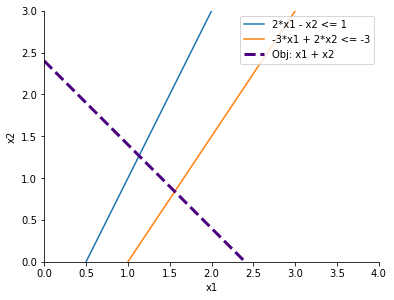

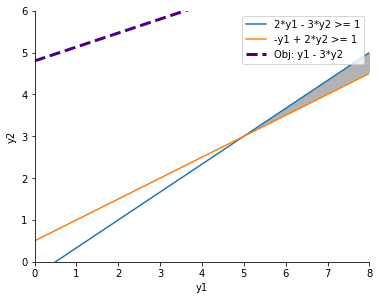

In [5]:
plotLP(primalLP2, x_lower=0, x_upper=4, y_lower=0, y_upper=3)
plotLP(dualLP2, x_lower=0, x_upper=8, y_lower=0, y_upper=6)

### Example 3: Primal unbounded, dual infeasible

We make further changes to the primal LP so that it becomes unbounded.

$$\begin{equation}\tag{Primal-LP3}
\begin{array}{lrrrrrrrrr}
\max          &  x_1 & + &  x_2 &   \\
\text{s.t. }  & -2x_1 & - &  x_2 & \leq & 1 \\
              & -x_1 & - & 2x_2 & \leq & -3 \\
              &  x_1 &   &      & \geq & 0\\
              &      &   &  x_2 & \geq & 0
\end{array}
\end{equation}$$

The corresponding dual is:

$$\begin{equation}\tag{Dual-LP3}
\begin{array}{lrrrrrrrr}
\min   & y_1  & - & 3y_2 & \\
\text{s.t. } & -2y_1 & - &  y_2  & \geq & 1 \\
             &  -y_1 & - & 2y_2  & \geq & 1 \\
             &  y_1 &   &       & \geq & 0 \\
             &      &   &  y_2  & \geq & 0 
\end{array}
\end{equation}$$

In [6]:
# Primal LP
primalLP3 = pulp.LpProblem("Primal3", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat=pulp.LpContinuous)
x2 = pulp.LpVariable('x2', lowBound=0, cat=pulp.LpContinuous)

primalLP3 += x1 + x2
primalLP3 += -2*x1 - x2 <= 1
primalLP3 += -x1 - 2*x2 <= -3

primalLP3.solve()
print("Status of the primal LP: " + str( pulp.LpStatus[primalLP3.status]) )

# Dual LP
dualLP3 = pulp.LpProblem("Dual3", pulp.LpMinimize)

y1 = pulp.LpVariable('y1', lowBound=0, cat=pulp.LpContinuous)
y2 = pulp.LpVariable('y2', lowBound=0, cat=pulp.LpContinuous)

dualLP3 += y1 - 3*y2
dualLP3 += -2*y1 - y2 >= 1
dualLP3 += -y1 - 2*y2 >= 1

dualLP3.solve()
print("Status of the dual LP: " + str( pulp.LpStatus[dualLP3.status]) )

Status of the primal LP: Undefined
Status of the dual LP: Undefined


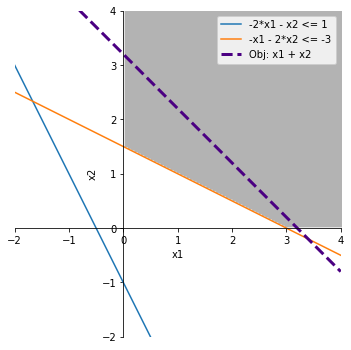

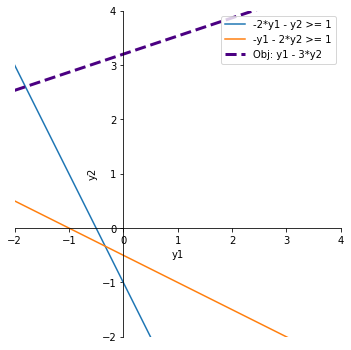

In [7]:
plotLP(primalLP3, x_lower=-2, x_upper=4, y_lower=-2, y_upper=4)
plotLP(dualLP3, x_lower=-2, x_upper=4, y_lower=-2, y_upper=4)

### Example 4: Primal infeasible, dual infeasible

We'd like you to come up with an example showing this case, starting from a an infeasible primal LP with unbounded dual (as in example 2):

$$\begin{equation}\tag{Primal-LP4}
\begin{array}{lrrrrrrrrr}
\max          &  x_1 & - &  x_2 &   \\
\text{s.t. }  & x_1 &  &   & \leq & -1 \\
              &  & - & x_2 & \leq & 1 \\
              &  x_1 &   &      & \geq & 0\\
              &      &   &  x_2 & \geq & 0
\end{array}
\end{equation}$$

Clearly, this primal LP is infeasible because $x_1\leq -1$ and $x_1\geq 0$ are contradicting.

The dual LP is the following:

$$\begin{equation}\tag{Dual-LP4}
\begin{array}{lrrrrrrrr}
\min   & -y_1  & + & y_2 & \\
\text{s.t. } & y_1 &  &    & \geq & 1 \\
             &   & - & y_2  & \geq & -1 \\
             &  y_1 &   &       & \geq & 0 \\
             &      &   &  y_2  & \geq & 0 
\end{array}
\end{equation}$$

In [8]:
# Primal LP
primalLP4 = pulp.LpProblem("Primal4", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat=pulp.LpContinuous)
x2 = pulp.LpVariable('x2', lowBound=0, cat=pulp.LpContinuous)

primalLP4 += x1 - x2

primalLP4 += x1 <= -1
primalLP4 += -x2 <= 1

primalLP4.solve()
print("Status of the primal LP: " + str( pulp.LpStatus[primalLP4.status]) )

# Dual LP
dualLP4 = pulp.LpProblem("Dual4", pulp.LpMinimize)

y1 = pulp.LpVariable('y1', lowBound=0, cat=pulp.LpContinuous)
y2 = pulp.LpVariable('y2', lowBound=0, cat=pulp.LpContinuous)

dualLP4 += - y1 + y2

dualLP4 += y1 >= 1
dualLP4 += - y2 >= -1

dualLP4.solve()
print("Status of the dual LP: " + str( pulp.LpStatus[dualLP4.status]) )

Status of the primal LP: Undefined
Status of the dual LP: Undefined


Using `PuLP`, we can see that the above dual LP is unbounded, not infeasible. 

## Your Task

**Your Task**: Think of a way to modify the objective function of the primal LP so that its dual becomes infeasible. Then check your answer using `PuLP`.

<font color="blue">
    <b>Solution:</b> The objective coefficients of the primal LP correspond to the right hand side entries $b_i$ of the dual. Since an LP being infeasble or not only depends on the constraints but not the objective function, we can modify the objective function of the primal LP without worrying about changing its infeasible status.

More specifically, consider the above primal LP with a general objective: $\max a\cdot x_1 + b\cdot x_2$. The constraints of the dual are then:

$$\begin{equation*}
\begin{array}{lrrrrrrrr}
y_1 &  &    & \geq & a \\
& - & y_2  & \geq & b \\
\end{array}
\end{equation*}$$

So if we wish the dual LP to be also infeasible, then we'd like its feasible region to be empty, that is, $$\{(y_1,y_2)\in \mathbb{R}_{\ge 0}^2: y_1\geq a,\,-y_2\geq b\}=\emptyset.$$

Notice that any $b>0$ will do. For example, we can let $b=1$ and use `PuLP` and plotting to check our solution to see that we do get an example where both primal and dual are infeasible.
</font>

In [9]:
# Primal LP
primalLP4_new = pulp.LpProblem("Primal4_new", pulp.LpMaximize)

x1 = pulp.LpVariable('x1', lowBound=0, cat=pulp.LpContinuous)
x2 = pulp.LpVariable('x2', lowBound=0, cat=pulp.LpContinuous)

primalLP4_new += x1 + x2

primalLP4_new += x1 + x2 <= -1
primalLP4_new += 2*x1 + x2 <= 2

primalLP4_new.solve()
print("Status of the primal: " + str( pulp.LpStatus[primalLP4_new.status]) )

# Dual LP
dualLP4_new = pulp.LpProblem("Dual4_new", pulp.LpMinimize)

y1 = pulp.LpVariable('y1', lowBound=0, cat=pulp.LpContinuous)
y2 = pulp.LpVariable('y2', lowBound=0, cat=pulp.LpContinuous)

dualLP4_new += - 2*y1 - 3*y2

dualLP4_new += - 2*y1 - y2 >= 1
dualLP4_new += - y1 - 3*y2 >= 1

dualLP4_new.solve()
print("Status of the dual: " + str( pulp.LpStatus[dualLP4_new.status]) )

Status of the primal: Undefined
Status of the dual: Undefined


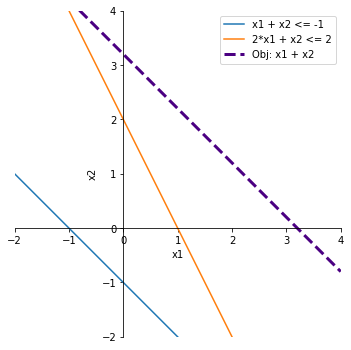

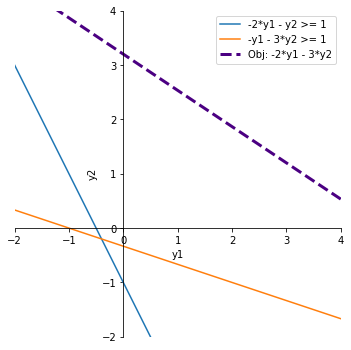

In [10]:
plotLP(primalLP4_new, x_lower=-2, x_upper=4, y_lower=-2, y_upper=4)
plotLP(dualLP4_new, x_lower=-2, x_upper=4, y_lower=-2, y_upper=4)

### Optional Task: Construct your own examples.


Now that you have seen examples of all four cases and tried to construct one example on your own, it is time to play around and construct some more examples yourself. This is a great chance for you to get more familiar with duality. 

Of course, you can construct your examples from scratch, but here are some suggestions for you to try out: 
- Try to modify some of the previous primal LPs to obtain examples of a different type (e.g. from finite optima to an infeasible primal and unbounded dual);
- Instead of modifying the primal, another option is to modify the dual and calculate its primal (note that the dual of a dual gives back the primal);
- Or you can think more abstractly and consider a primal LP of the following form. Write down its dual, and then try to find values of the unknowns $a,\dots,h$ so that you get examples of the four different cases. 

$$\begin{equation*}
\begin{array}{lrrrrrrrrr}
\max          &  a\cdot x_1 & + & b\cdot x_2 &   \\
\text{s.t. }  & c\cdot x_1 & + & d\cdot x_2  & \leq & e \\
              & f\cdot x_1 & + & g\cdot x_2  & \leq & h \\
              &  x_1 &   &      & \geq & 0\\
              &      &   &  x_2 & \geq & 0
\end{array}
\end{equation*}$$

In [11]:
# Construct your own examples!

